In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

import warnings
warnings.simplefilter("ignore", FutureWarning)

In [2]:
large = pd.read_csv('large.csv')

In [3]:
labels = pd.read_csv('jeopardy.csv')

In [4]:
data = pd.merge(large, labels, how='left',on = 'cif')

In [5]:
data.describe()

,cif,category,turnover,transaction_count,io_ratio,age,nationality,is_pep,inactive_days_average,inactive_days_max,n_of_accounts,distinct_counterparties,channel_risk,atm_withdrawal,atm_deposit,suspicious
count,1.000000e+06,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000
mean,9.050000e+07,0.400530,2.937814e+07,28.136660,0.331490,31.726469,91.863301,0.006851,44.768997,114.264231,1.996756,6.246905,0.255042,3.212197e+06,1.078914e+05,0.017141
std,2.886753e+05,0.663837,4.650136e+08,55.464787,0.308724,25.749573,43.678328,0.082487,52.223190,77.830115,0.999137,16.322718,0.174461,1.820511e+08,3.420959e+06,0.129797
min,9.000000e+07,0.000000,0.000000e+00,0.000000,0.000000,0.000000,24.000000,0.000000,0.120000,1.000000,1.000000,0.000000,0.000026,0.000000e+00,0.000000e+00,0.000000
25%,9.025000e+07,0.000000,9.053680e+04,1.000000,0.000000,0.000000,82.000000,0.000000,5.680000,72.000000,1.000000,1.000000,0.122934,1.592175e+02,2.249756e+01,0.000000
50%,9.050000e+07,0.000000,4.316990e+05,3.000000,0.309917,32.000000,90.000000,0.000000,28.220000,95.000000,2.000000,1.000000,0.217838,4.934665e+03,4.699416e+02,0.000000
75%,9.075000e+07,1.000000,1.529052e+06,30.000000,0.500000,54.000000,123.000000,0.000000,63.520000,131.000000,3.000000,4.000000,0.348258,4.920691e+04,3.577423e+03,0.000000
max,9.100000e+07,2.000000,1.308870e+11,1472.000000,1.000000,126.000000,187.000000,1.000000,1281.110000,1295.000000,10.000000,700.000000,0.998780,1.186690e+11,2.155327e+09,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
cif                        1000000 non-null int64
category                   1000000 non-null int64
turnover                   1000000 non-null float64
transaction_count          1000000 non-null int64
io_ratio                   1000000 non-null float64
age                        1000000 non-null int64
nationality                1000000 non-null int64
is_pep                     1000000 non-null int64
inactive_days_average      1000000 non-null float64
inactive_days_max          1000000 non-null int64
n_of_accounts              1000000 non-null int64
distinct_counterparties    1000000 non-null int64
channel_risk               1000000 non-null float64
atm_withdrawal             1000000 non-null float64
atm_deposit                1000000 non-null float64
suspicious                 1000000 non-null int64
dtypes: float64(6), int64(10)
memory usage: 129.7 MB


In [7]:
data.columns

Index(['cif', 'category', 'turnover', 'transaction_count', 'io_ratio', 'age',
       'nationality', 'is_pep', 'inactive_days_average', 'inactive_days_max',
       'n_of_accounts', 'distinct_counterparties', 'channel_risk',
       'atm_withdrawal', 'atm_deposit', 'suspicious'],
      dtype='object')

In [8]:
features = ['category', 'turnover', 'transaction_count', 'io_ratio', 'age',
       'nationality', 'is_pep', 'inactive_days_average', 'inactive_days_max',
       'n_of_accounts', 'distinct_counterparties', 'channel_risk',
       'atm_withdrawal', 'atm_deposit']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data[features], data['suspicious'], test_size=0.3, random_state=42)

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700000 entries, 506532 to 121958
Data columns (total 14 columns):
category                   700000 non-null int64
turnover                   700000 non-null float64
transaction_count          700000 non-null int64
io_ratio                   700000 non-null float64
age                        700000 non-null int64
nationality                700000 non-null int64
is_pep                     700000 non-null int64
inactive_days_average      700000 non-null float64
inactive_days_max          700000 non-null int64
n_of_accounts              700000 non-null int64
distinct_counterparties    700000 non-null int64
channel_risk               700000 non-null float64
atm_withdrawal             700000 non-null float64
atm_deposit                700000 non-null float64
dtypes: float64(6), int64(8)
memory usage: 80.1 MB


In [11]:
#Start time to measure how much time it gets our classifier to train a model
start_time = time.time()
# class_weight='balanced' to deal with a problem with highly imbalanced dataset
rf =  RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state = 42)
rf.fit(X_train, y_train)
preds = rf.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))
#Using confusion matrix as our metrics
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print("tn, fp, fn, tp:", tn, fp, fn, tp)

--- 205.77743911743164 seconds ---
tn, fp, fn, tp: 294790 51 4529 630


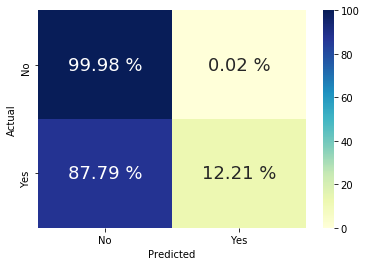

Number of total customers in test set: 300000
Number of customer without suspicious behaviour: 294841
Number of customer withsuspicious behaviour: 5159


In [15]:
#Calculating the size od test set, suspisious number of customer and non-suspisiouc number of customers
s = len(X_test)
f = y_test.sum()
non_f = s - f
#Plotting confusion matrix as a heatmap and see how many (%) we get right/wrong among suspicious and non-suspicious customers
ax = sns.heatmap([[tn/non_f*100, fp/non_f*100],[fn/f*100, tp/f*100]],annot_kws={"size": 18},annot=True,fmt=".2f", cmap='YlGnBu')
for t in ax.texts: t.set_text(t.get_text() + " %")
plt.xlabel("Predicted")
plt.ylabel("Actual")
ax.set_xticklabels(["No", "Yes"])
ax.set_yticklabels(["No", "Yes"])
plt.show()
print("Number of total customers in test set:", s)
print("Number of customer without suspicious behaviour:", non_f)
print("Number of customer withsuspicious behaviour:", f)

In [88]:
importance = pd.DataFrame(rf.feature_importances_)
importance.index = features
df = importance.rename(columns={0:"Importance"}).sort_values(by='Importance', ascending=False)
df

,Importance
io_ratio,0.141345
age,0.117149
turnover,0.116277
atm_withdrawal,0.116037
inactive_days_average,0.092435
channel_risk,0.092351
inactive_days_max,0.074397
atm_deposit,0.071815
nationality,0.056876
transaction_count,0.055933


In [54]:
df.Importance.nlargest(6)

io_ratio                 0.141345
age                      0.117149
turnover                 0.116277
atm_withdrawal           0.116037
inactive_days_average    0.092435
channel_risk             0.092351
Name: Importance, dtype: float64

In [80]:
df

,Importance
io_ratio,0.141345
age,0.117149
turnover,0.116277
atm_withdrawal,0.116037
inactive_days_average,0.092435
channel_risk,0.092351
inactive_days_max,0.074397
atm_deposit,0.071815
nationality,0.056876
transaction_count,0.055933


In [89]:
df.reset_index(inplace=True)
df.columns=["Features", "Importance"]


In [90]:
df

,Features,Importance
0,io_ratio,0.141345
1,age,0.117149
2,turnover,0.116277
3,atm_withdrawal,0.116037
4,inactive_days_average,0.092435
5,channel_risk,0.092351
6,inactive_days_max,0.074397
7,atm_deposit,0.071815
8,nationality,0.056876
9,transaction_count,0.055933


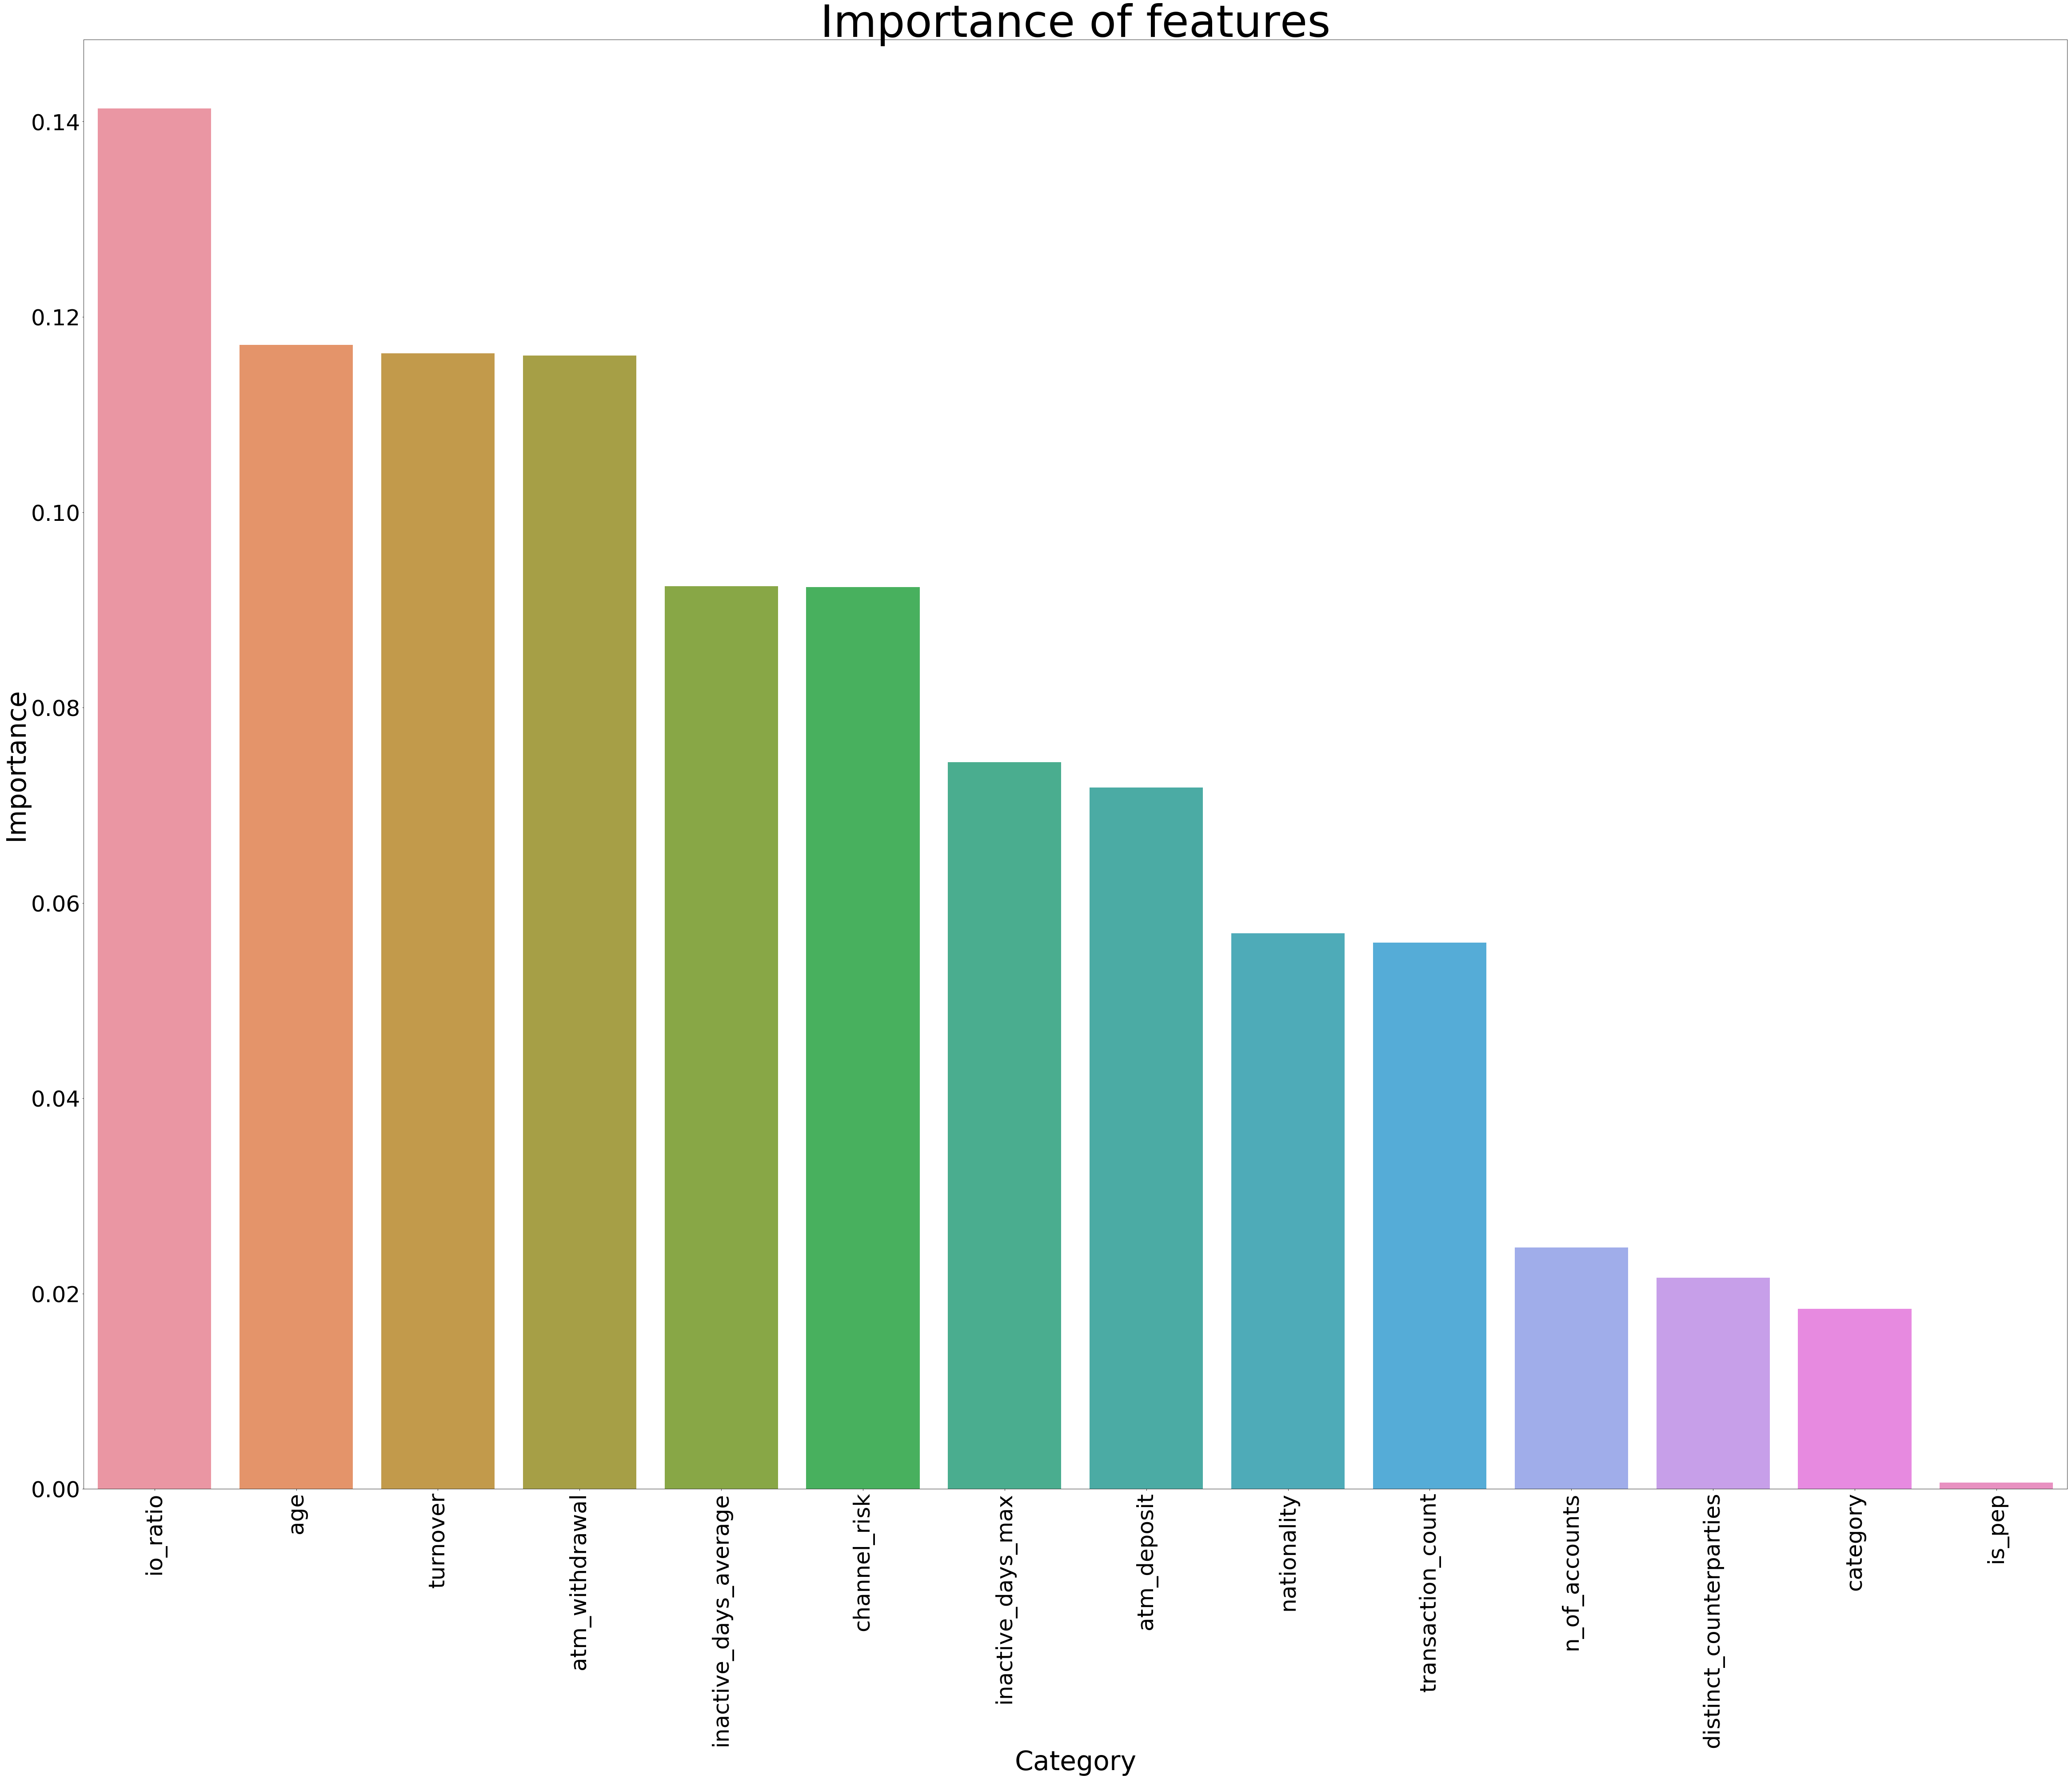

In [99]:
#lables = df.Features
fig, ax = plt.subplots(1, 1, figsize=(80,60))
ax.tick_params(axis = 'both', which = 'major', labelsize = 50)
sns.barplot(x=df.Features, y=df.Importance)
              
plt.xlabel('Category', fontsize=60)
plt.ylabel('Importance', fontsize=60)

plt.xticks(rotation='vertical')

plt.title('Importance of features', fontsize=100)
plt.savefig('feature_importance.png')
plt.show()